In [1]:
from sklearn import preprocessing
import numpy as np

from matplotlib.colors import to_rgb, to_rgba
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

In [2]:
filename = 'C:/Users/yyoon.ces/Downloads/histograms.npy'
data = np.load(filename)

In [3]:
np.shape(data)

(30, 125, 10, 25, 4)

In [4]:
circuit_one = data[0, :]
np.shape(circuit_one)

(125, 10, 25, 4)

In [5]:
np.shape(circuit_one[0])

(10, 25, 4)

In [6]:
circuit_one_t = []

for i in range(125):
    temp = np.transpose(circuit_one[i])
    circuit_one_t.append(temp)

In [7]:
np.shape(circuit_one_t)

(125, 4, 25, 10)

In [8]:
cs = circuit_one_t[124]

In [9]:
data_tl, data_tr, data_br, data_bl = cs[0], cs[1], cs[2], cs[3]

In [10]:
# data_**_copy will be used to specify the alpha values afterwards
data_tr_copy = data_tr.copy()
data_tl_copy = data_tl.copy()
data_br_copy = data_br.copy()
data_bl_copy = data_bl.copy()

In [11]:
data_tr_copy

array([[0.04666667, 0.04666667, 0.01333333, 0.04      , 0.04      ,
        0.06      , 0.04      , 0.03333333, 0.04      , 0.04      ],
       [0.09333333, 0.11333333, 0.16666667, 0.10666667, 0.15333333,
        0.13333333, 0.16      , 0.09333333, 0.12      , 0.11333333],
       [0.04      , 0.06666667, 0.04      , 0.05333333, 0.05333333,
        0.03333333, 0.08      , 0.02      , 0.04666667, 0.04      ],
       [0.02666667, 0.03333333, 0.06      , 0.04      , 0.00666667,
        0.01333333, 0.02666667, 0.05333333, 0.01333333, 0.04      ],
       [0.00666667, 0.01333333, 0.        , 0.03333333, 0.02666667,
        0.01333333, 0.00666667, 0.01333333, 0.01333333, 0.00666667],
       [0.03333333, 0.02      , 0.01333333, 0.01333333, 0.00666667,
        0.00666667, 0.00666667, 0.01333333, 0.00666667, 0.        ],
       [0.00666667, 0.00666667, 0.        , 0.        , 0.00666667,
        0.02      , 0.        , 0.02666667, 0.01333333, 0.01333333],
       [0.00666667, 0.02666667, 0.02     

In [12]:
for i in range(25):
    for j in range(10):
        if data_tl[i][j] >= 0.09333333:
            data_tl[i][j] = j + 1
        else:
            data_tl[i][j] = 0
            data_tl_copy[i][j] = 0
            
        if data_tr[i][j] >= 0.09333333:
            data_tr[i][j] = j + 1
        else:
            data_tr[i][j] = 0
            data_tr_copy[i][j] = 0
            
        if data_br[i][j] >= 0.09333333:
            data_br[i][j] = j + 1
        else:
            data_br[i][j] = 0
            data_br_copy[i][j] = 0

        if data_bl[i][j] >= 0.09333333:
            data_bl[i][j] = j + 1
        else:
            data_bl[i][j] = 0
            data_bl_copy[i][j] = 0

In [13]:
# normalise the data_**_copy to [0, 1] so that it matches with the alpha value [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
data_tr_minmax = min_max_scaler.fit_transform(data_tr_copy)
data_tl_minmax = min_max_scaler.fit_transform(data_tl_copy)
data_br_minmax = min_max_scaler.fit_transform(data_br_copy)
data_bl_minmax = min_max_scaler.fit_transform(data_bl_copy)

In [14]:
# data_tr_minmax = data_tr_minmax.transpose()
# data_tl_minmax = data_tl_minmax.transpose()
# data_br_minmax = data_br_minmax.transpose()
# data_bl_minmax = data_bl_minmax.transpose()

In [15]:
np.shape(data_tr_minmax)

(25, 10)

In [16]:
rgba_colors_tr = np.zeros((25, 10, 4))
rgba_colors_tl = np.zeros((25, 10, 4))
rgba_colors_br = np.zeros((25, 10, 4))
rgba_colors_bl = np.zeros((25, 10, 4))

# the first three columns specift the rgb code (normalised to [0, 1])
rgba_colors_tl[:, :, 0] = 1.0    # red
rgba_colors_tr[:, :, 1] = 1.0    # green
rgba_colors_br[:, :, 2] = 1.0    # blue
rgba_colors_bl[:, :, 0] = 0.980  # orange
rgba_colors_bl[:, :, 1] = 0.313  # orange

for i in range(25):
    alphas_tr = data_tr_minmax[i]
    alphas_tl = data_tl_minmax[i]
    alphas_br = data_br_minmax[i]
    alphas_bl = data_bl_minmax[i]
    
    for j in range(10):
        # the fourth column needs to be your alphas
        rgba_colors_tr[i, j, 3] = alphas_tr[j]
        rgba_colors_tl[i, j, 3] = alphas_tl[j]
        rgba_colors_br[i, j, 3] = alphas_br[j]
        rgba_colors_bl[i, j, 3] = alphas_bl[j]

In [17]:
rgba_colors_bl

array([[[0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ]],

       [[0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ]],

       [[0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        [0.98 , 0.313, 0.   , 0.   ],
        

In [18]:
lineoffsets1 = [i+1 for i in range(25)]
linelengths = [0.5 for i in range(25)]

linelengths1 = [0.8 for i in range(25)]
linelengths2 = [0.6 for i in range(25)]
linelengths3 = [0.4 for i in range(25)]
linelengths4 = [0.2 for i in range(25)]

#color_set = ['red', 'green', 'blue', 'orange']
x_range = np.linspace(1, 25, 25, endpoint=True)
y_range = np.linspace(1, 10, 10, endpoint=True)
color_set = [rgba_colors_tl, rgba_colors_tr, rgba_colors_br, rgba_colors_bl]

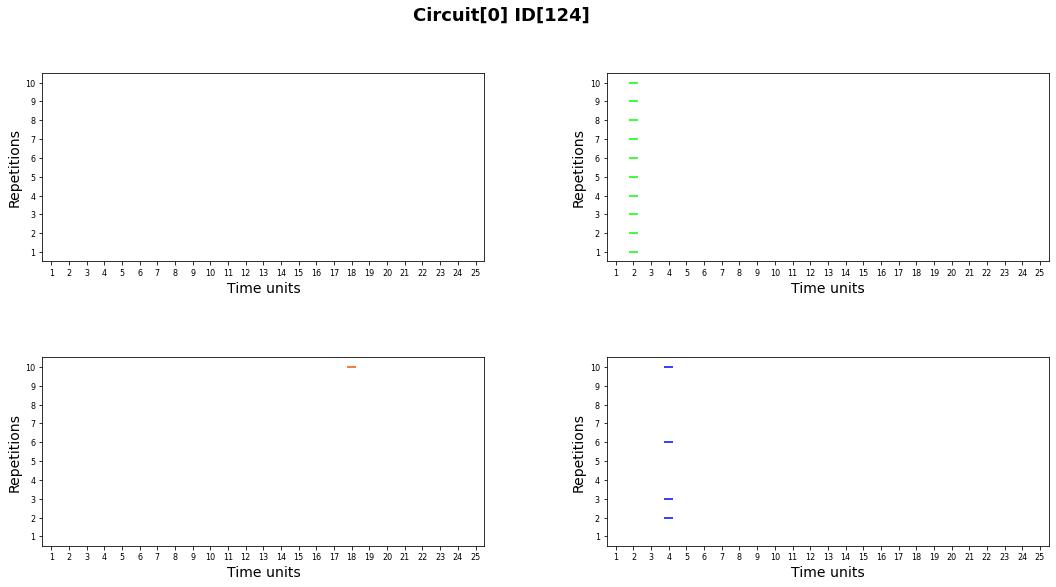

In [19]:
fig, axs = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        if (i == 0 and j == 0):
            data = data_tl
            idx = 0
        if (i == 0 and j == 1):
            data = data_tr
            idx = 1
        if (i == 1 and j == 1):
            data = data_br
            idx = 2
        if (i == 1 and j == 0):
            data = data_bl
            idx = 3
            
        axs[i, j].eventplot(data, 
                            colors=color_set[idx], 
                            lineoffsets=lineoffsets1, 
                            linelengths=linelengths,
                            orientation='vertical')
        
        axs[i, j].set_xlim(0.5, 25.5)
        axs[i, j].set_ylim(0.5, 10.5)
        axs[i, j].set_xticks(x_range)
        axs[i, j].set_yticks(y_range)
        axs[i, j].set_ylabel("Repetitions", fontsize = 14)
        axs[i, j].set_xlabel("Time units", fontsize = 14)

fig.suptitle('Circuit[0] ID[124]', fontweight = "bold", fontsize = 18)
fig.tight_layout()
fig.set_size_inches(16, 9)
fig.savefig('circuit[0] ID[124].png', dpi=600)

# Recycle Bin

In [20]:
# fig, axs = plt.subplots()
# twin1, twin2, twin3 = axs.twinx(), axs.twinx(), axs.twinx()

# axs.eventplot(data_tl_minmax, 
#               colors='red', 
#               lineoffsets=lineoffsets1, 
#               linelengths=linelengths1,
#               orientation='vertical')
        
# twin1.eventplot(data_tr_minmax, 
#                 colors='green', 
#                 lineoffsets=lineoffsets1, 
#                 linelengths=linelengths2,
#                 orientation='vertical')

# twin2.eventplot(data_br_minmax, 
#                 colors='blue', 
#                 lineoffsets=lineoffsets1, 
#                 linelengths=linelengths3,
#                 orientation='vertical')

# twin3.eventplot(data_bl_minmax, 
#                 colors='orange', 
#                 lineoffsets=lineoffsets1, 
#                 linelengths=linelengths4,
#                 orientation='vertical')
        
# axs.set_xlim(0.5, 25.5)
# axs.set_ylim(0.5, 10.5)
# twin1.set_ylim(0.5, 10.5)
# twin2.set_ylim(0.5, 10.5)
# twin3.set_ylim(0.5, 10.5)

# axs.set_xticks(x_range)
# axs.set_yticks(y_range)
# twin1.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# twin2.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# twin3.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# axs.set_ylabel("Repetitions", fontsize = 14)
# axs.set_xlabel("Time units", fontsize = 14)

# axs.set_title("Circuit[0] ID[0] \n [R, G, C, Y] <-> [Tl, Tr, Br, Bl]", fontsize = 18)

# fig.tight_layout()
# fig.set_size_inches(16, 9)
# #fig.savefig('circuit[0] ID[0] combine.png', dpi=600)